In [39]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [40]:
def plot_point_n_line(x, y, m, b, title=None):
    plt.figure(figsize=(4, 3))
    plt.title(title, color='black')
    plt.scatter(x, y)
    N = x.shape[0]
    yy = x*m+b
    plt.plot(x, yy, color='g')
    plt.show()

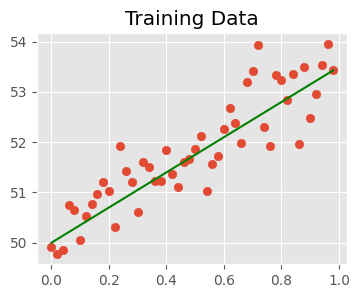

In [41]:
w_real = 3.5
b_real = 50

n_of_point = 50
noise_amplitude = 0.5
# x = np.arange(n_of_point)
x = np.arange(0, 1, 1/n_of_point)
noise = noise_amplitude*np.random.randn(n_of_point)
y = x*w_real+b_real + noise
plot_point_n_line(x, y, w_real, b_real, "Training Data")

In [42]:
learning_rate = 5e-3
epochs = 20_000

# Initalize weight, bias
weight, bias = 0, 0

In [43]:
# Calculate gradient descend
def gradient_descend(weight, bias, x, y_real, learning_rate):
    
    # loss function: sum((y-y_hat)**2)/N
    # y_hat = x*w + b
    # then -> loss: sum((y_real-x*w-b)**2)/N
    # diff_respect_to_w -> 2*(y_real-x*w-b)*(-x)/N
    # diff_respect_to_b -> 2*(y_real-x*w-b)*(-1)/N
    # Calculate derivative
    N = y_real.shape[0]
    dl_dw = np.sum(2*(y_real-x*weight-bias)*(-x))/N
    dl_db = np.sum(2*(y_real-x*weight-bias)*(-1))/N
    
    # Step in gradient
    weight_new = weight - learning_rate * dl_dw
    bias_new = bias - learning_rate * dl_db
    return weight_new, bias_new

In [44]:
# Training
history = {
    'loss': [],
    'weight': [],
    'bias': []
}

show_each = 5_000

for epoch in range(1, epochs+1):
    # Calculate new weight and bias
    weight, bias = gradient_descend(weight, bias, x, y, learning_rate)
    
    # Predict
    y_hat = x*weight+bias
    
    # Calculate loss
    N = x.shape[0]
    loss = np.divide(np.sum((y_hat-y)**2, axis=0), N)
    
    # Add to history
    history['loss'].append(loss)
    history['weight'].append(weight)
    history['bias'].append(bias)
    
    # Show (show_each == 0 -> not show)
    if show_each != 0 and not epoch%show_each:
        print(f'Epoch: {epoch}/{epochs}\t| loss: {loss}, weight: {weight}, bias: {bias}')

Epoch: 5000/20000	| loss: 0.27740693412141404, weight: 4.094220074393503, bias: 49.79409635009387
Epoch: 10000/20000	| loss: 0.24152796425558687, weight: 3.465917843175423, bias: 50.12381192438854
Epoch: 15000/20000	| loss: 0.24148052023572233, weight: 3.4430703077786826, bias: 50.135801676899746
Epoch: 20000/20000	| loss: 0.2414804574988311, weight: 3.442239481708405, bias: 50.136237671364334


In [45]:
# print(history['loss'])
# plt.plot(history['loss'][100:])
# plt.show()

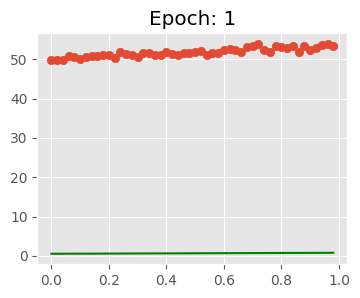

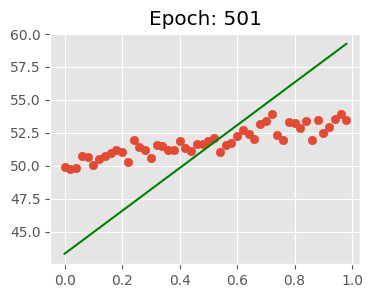

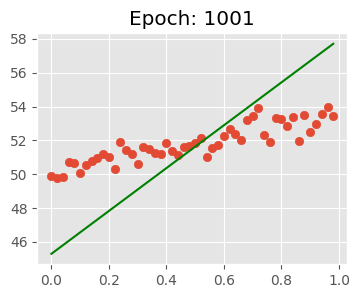

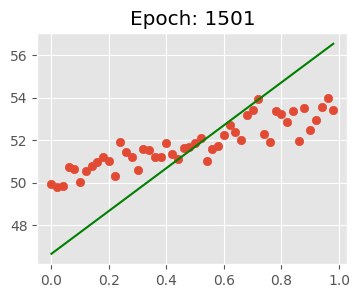

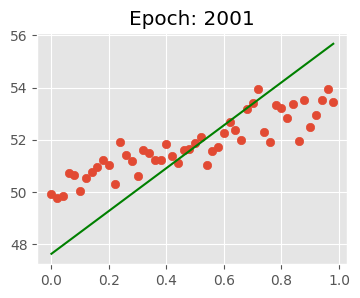

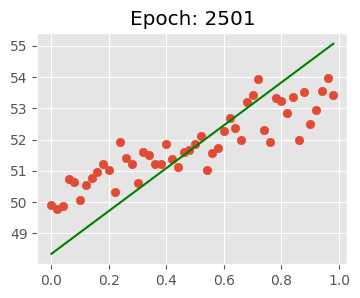

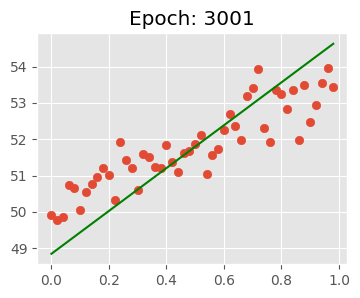

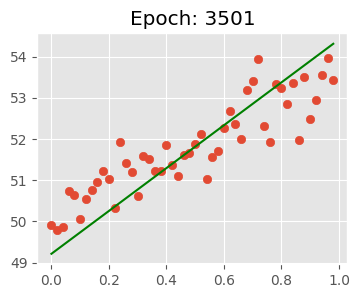

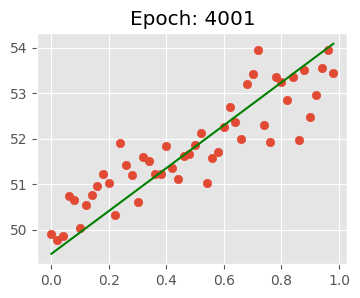

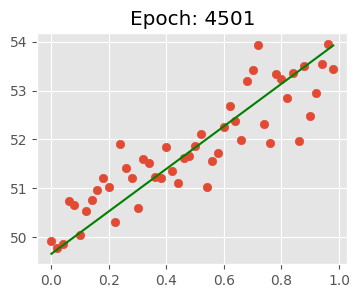

In [49]:
show_each = 500
for epoch in range(5_000):
    if show_each != 0 and not epoch%show_each:
        plot_point_n_line(x, y, history['weight'][epoch], history['bias'][epoch], f'Epoch: {epoch+1}')

real_weight: 3.5, real_bias: 50
weight: 3.442239481708405, bias: 50.136237671364334


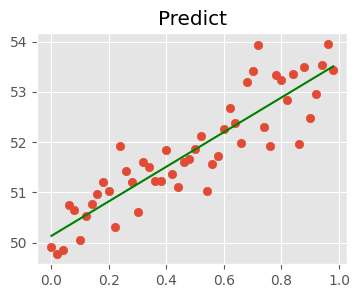

In [47]:
print(f'real_weight: {w_real}, real_bias: {b_real}')
print(f'weight: {weight}, bias: {bias}')
plot_point_n_line(x, y, weight, bias, "Predict")
# Might have some bug